In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


# Install TensorFlow

import tensorflow as tf
import tensorflow_hub as hub


In [6]:
cna_efgr = pd.read_csv("../data/cna_ic50_Erlotinib_binary_resp.tsv",sep = "\t", index_col="COSMIC_ID")
cna_pacl = pd.read_csv("../data/cna_ic50_Paclitaxel_binary_resp.tsv",sep = "\t", index_col="COSMIC_ID")
cna_suni = pd.read_csv("../data/cna_ic50_Sunitinib_binary_resp.tsv",sep = "\t", index_col="COSMIC_ID")
cna_sora = pd.read_csv("../data/cna_ic50_Sorafenib_binary_resp.tsv",sep = "\t", index_col="COSMIC_ID")
cna_rapa = pd.read_csv("../data/cna_ic50_Rapamycin_binary_resp.tsv",sep = "\t", index_col="COSMIC_ID")


In [8]:
cna_multi_drug = pd.concat([cna_efgr, cna_pacl, cna_suni, cna_sora,cna_rapa], axis=0)

In [9]:
cna_multi_drug.head()

,Unnamed: 0,1,2,9,10,12,13,14,15,16,...,107161145,107985535,107986809,107987337,107987341,109731405,112441434,DRUG_ID,LN_IC50,BINARY_RESPONSE
COSMIC_ID,,,,,,,,,,,,,,,,,,,,,
1240128,0,-0.584963,0.415037,-0.584963,-0.584963,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.584963,0.000000,-4.320000,-4.320000,0.000000,0.000000,1,2.632372,R
1240173,1,0.000000,-0.415037,0.321928,0.321928,-0.415037,0.321928,0.000000,0.000000,-0.415037,...,0.000000,0.000000,0.321928,-4.320000,-4.320000,-0.415037,-0.415037,1,3.323416,R
1240181,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.584963,-1.584963,0.000000,0.000000,1,2.836213,R
1240182,3,0.000000,0.415037,0.415037,0.415037,0.415037,0.415037,0.000000,0.415037,-0.584963,...,0.000000,0.000000,0.000000,-1.584963,-4.320000,-0.584963,-0.584963,1,2.717111,R
1240183,4,-0.415037,0.000000,-1.000000,-1.000000,0.000000,0.000000,-0.415037,0.000000,-0.415037,...,0.321928,0.321928,0.000000,-4.320000,-4.320000,-0.415037,0.321928,1,0.508283,S


In [22]:
len(cna_multi_drug)

cna_multi_drug = cna_multi_drug.drop('LN_IC50', axis=1)
cna_multi_drug = cna_multi_drug.drop('Unnamed: 0', axis=1)

cna_multi_drug.loc[(cna_multi_drug.BINARY_RESPONSE == 'S'),'BINARY_RESPONSE'] = 1
cna_multi_drug.loc[(cna_multi_drug.BINARY_RESPONSE == 'R'),'BINARY_RESPONSE'] = 0

cna_multi_drug.head()

/Users/kbloom/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,1,2,9,10,12,13,14,15,16,18,...,107133524,107161145,107985535,107986809,107987337,107987341,109731405,112441434,DRUG_ID,BINARY_RESPONSE
COSMIC_ID,,,,,,,,,,,,,,,,,,,,,
1240128,-0.584963,0.415037,-0.584963,-0.584963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.584963,0.000000,-0.584963,0.000000,-4.320000,-4.320000,0.000000,0.000000,1,0
1240173,0.000000,-0.415037,0.321928,0.321928,-0.415037,0.321928,0.000000,0.000000,-0.415037,-0.415037,...,0.000000,0.000000,0.000000,0.321928,-4.320000,-4.320000,-0.415037,-0.415037,1,0
1240181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.584963,-1.584963,0.000000,0.000000,1,0
1240182,0.000000,0.415037,0.415037,0.415037,0.415037,0.415037,0.000000,0.415037,-0.584963,0.000000,...,0.415037,0.000000,0.000000,0.000000,-1.584963,-4.320000,-0.584963,-0.584963,1,0
1240183,-0.415037,0.000000,-1.000000,-1.000000,0.000000,0.000000,-0.415037,0.000000,-0.415037,-0.415037,...,0.321928,0.321928,0.321928,0.000000,-4.320000,-4.320000,-0.415037,0.321928,1,1


In [23]:
# split data
train_data_set, dev_data_set, train_labels, dev_labels = train_test_split(cna_multi_drug, cna_multi_drug['BINARY_RESPONSE'], test_size=0.20, random_state=0)


In [85]:
#target = wes_multi_drug.pop('BINARY_RESPONSE')



In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data_set.values, train_labels.values))
train_dataset = train_dataset.shuffle(len(train_data_set)).batch(1)

In [26]:
test_dataset = tf.data.Dataset.from_tensor_slices((dev_data_set.values, dev_labels.values))
test_dataset = test_dataset.shuffle(len(dev_data_set)).batch(1)

In [27]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(18384,)),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_dataset, epochs=10, steps_per_epoch=150)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train for 90 steps
Epoch 1/10
90/90 [==============================] - 1s 16ms/step - loss: 4.2988 - accuracy: 0.7778
Epoch 2/10
90/90 [==============================] - 1s 9ms/step - loss: 5.2112 - accuracy: 0.8000
Epoch 3/10
90/90 [==============================] - 1s 9ms/step - loss: 2.5472 - accuracy: 0.8000
Epoch 4/10
90/90 [==============================] - 1s 9ms/step - loss: 5.3535 - accuracy: 0.7333
Epoch 5/10
90/90 [==============================] - 1s 9ms/step - loss: 4.7414 - accuracy: 0.777

In [29]:
model.evaluate(test_dataset, verbose=2, steps=len(dev_data_set))

388/388 - 1s - loss: 1.0584 - accuracy: 0.8247


[1.0583661399617916, 0.82474226]

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  3127040   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 3,128,330
Trainable params: 3,128,330
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.save('cna_multi_model')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cna_multi_model/assets


In [130]:
new_model = tf.keras.models.load_model('wes_multi_model')

# Check its architecture
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 18384)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               2353280   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 2,354,570
Trainable params: 2,354,570
Non-trainable params: 0
_________________________________________________________________


In [68]:
hub_url = "cna_multi_model/"
embed = hub.KerasLayer(hub_url, input_shape=(24429,), dtype=tf.float64, trainable=False)

In [69]:
anotha_model = tf.keras.Sequential([
    embed,
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [70]:
anotha_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [80]:
history = anotha_model.fit(train_dataset, epochs=10, steps_per_epoch=150, validation_data=(test_dataset))

Train for 150 steps, validate for 388 steps
Epoch 1/10
150/150 [==============================] - 1s 9ms/step - loss: 0.3978 - accuracy: 0.8533 - val_loss: 0.2761 - val_accuracy: 0.9227
Epoch 2/10
150/150 [==============================] - 1s 7ms/step - loss: 0.3804 - accuracy: 0.8667 - val_loss: 0.2784 - val_accuracy: 0.9227
Epoch 3/10
150/150 [==============================] - 1s 7ms/step - loss: 0.3920 - accuracy: 0.8667 - val_loss: 0.2777 - val_accuracy: 0.9227
Epoch 4/10
150/150 [==============================] - 1s 7ms/step - loss: 0.3164 - accuracy: 0.8933 - val_loss: 0.2740 - val_accuracy: 0.9227
Epoch 5/10
150/150 [==============================] - 1s 7ms/step - loss: 0.2604 - accuracy: 0.9400 - val_loss: 0.2665 - val_accuracy: 0.9227
Epoch 6/10
150/150 [==============================] - 1s 7ms/step - loss: 0.4356 - accuracy: 0.8400 - val_loss: 0.2716 - val_accuracy: 0.9227
Epoch 7/10
150/150 [==============================] - 1s 7ms/step - loss: 0.2934 - accuracy: 0.9133 - va

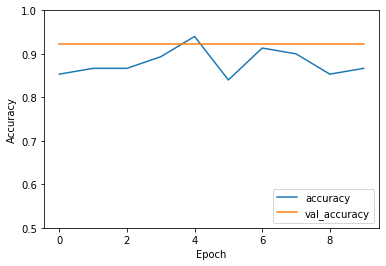

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [82]:
test_loss, test_acc = anotha_model.evaluate(test_dataset, verbose=2, steps=len(dev_data_set))

388/388 - 1s - loss: 0.2742 - accuracy: 0.9227


In [65]:
all_weights = []
for layer in anotha_model.layers:
   w = layer.get_weights()
   all_weights.append(w)

In [74]:
print(test_acc)

0.92268044


In [67]:
print(all_weights)

[[array([[-0.04909669, -0.01523309, -0.01865687, ..., -0.01055465,
         0.01344721, -0.02748404],
       [-0.03641999, -0.02685677,  0.00290082, ..., -0.03744866,
        -0.0090578 , -0.04769251],
       [ 0.00803957, -0.00854779,  0.02295541, ..., -0.0115859 ,
         0.02968053,  0.03313942],
       ...,
       [-0.0318936 , -0.00824761, -0.01459652, ...,  0.03438311,
         0.02144709,  0.04907155],
       [-0.07699451, -0.02163057, -0.05207279, ..., -0.04741478,
        -0.02081542, -0.003164  ],
       [ 0.01142061, -0.06648941, -0.01294564, ..., -0.00021745,
         0.02926855,  0.06726924]], dtype=float32), array([-0.05742534, -0.02629478, -0.05400872, -0.03673787, -0.03749199,
       -0.04593214, -0.0265057 ,  0.00884796, -0.02059793, -0.01546956,
       -0.01579989,  0.03631994, -0.0211074 , -0.00523069, -0.02447747,
       -0.02517388, -0.02245427,  0.04299168,  0.00242443, -0.02518057,
       -0.00963164, -0.03565749, -0.0485021 , -0.0081458 , -0.02202019,
       -0